In [1]:
from pyspark.sql import SparkSession

In [82]:
from pyspark.sql.functions import col, mean, avg, max, abs

In [2]:
spark = SparkSession.builder.appName('logreg').getOrCreate()

In [3]:
data = spark.read.csv(r"C:\Users\Asus\Desktop\studia big data\Python-and-Spark-for-Big-Data-master\Spark_for_Machine_Learning\Linear_Regression\Ecommerce_Customers.csv", inferSchema=True, header=True)

In [22]:
for col_name in data.columns:
    data = data.withColumnRenamed(col_name, col_name.replace(" ", "_"))
    

In [42]:
data.printSchema

<bound method DataFrame.printSchema of DataFrame[Email: string, Address: string, Avatar: string, Avg_Session_Length: double, Time_on_App: double, Time_on_Website: double, Length_of_Membership: double, Yearly_Amount_Spent: int]>

In [43]:
data = data.withColumn('Yearly_Amount_Spent', col('Yearly_Amount_Spent').cast('int'))

In [44]:
data.head()

Row(Email='mstephenson@fernandez.com', Address='835 Frank TunnelWrightmouth, MI 82180-9605', Avatar='Violet', Avg_Session_Length=34.49726772511229, Time_on_App=12.65565114916675, Time_on_Website=39.57766801952616, Length_of_Membership=4.0826206329529615, Yearly_Amount_Spent=587)

In [45]:
from pyspark.ml.classification import LogisticRegression

In [46]:
from pyspark.ml.feature import VectorAssembler

In [47]:
assembler = VectorAssembler(inputCols=[ 'Avg_Session_Length',
 'Time_on_App',
 'Time_on_Website',
 'Length_of_Membership'], outputCol='features')

In [48]:
step_one = assembler.transform(data)

In [49]:
model = step_one.select('features', 'Yearly_Amount_Spent')

In [50]:
train_data, test_data = model.randomSplit([0.7, 0.3])

In [51]:
lr = LogisticRegression(labelCol='Yearly_Amount_Spent', featuresCol='features')

In [52]:
model_train = lr.fit(train_data)

In [53]:
pred = model_train.transform(test_data)


In [66]:
matplot_model1 = pred.select('Yearly_Amount_Spent', 'prediction')
matplot_model = matplot_model1.toPandas()

In [62]:
import matplotlib.pyplot as plt

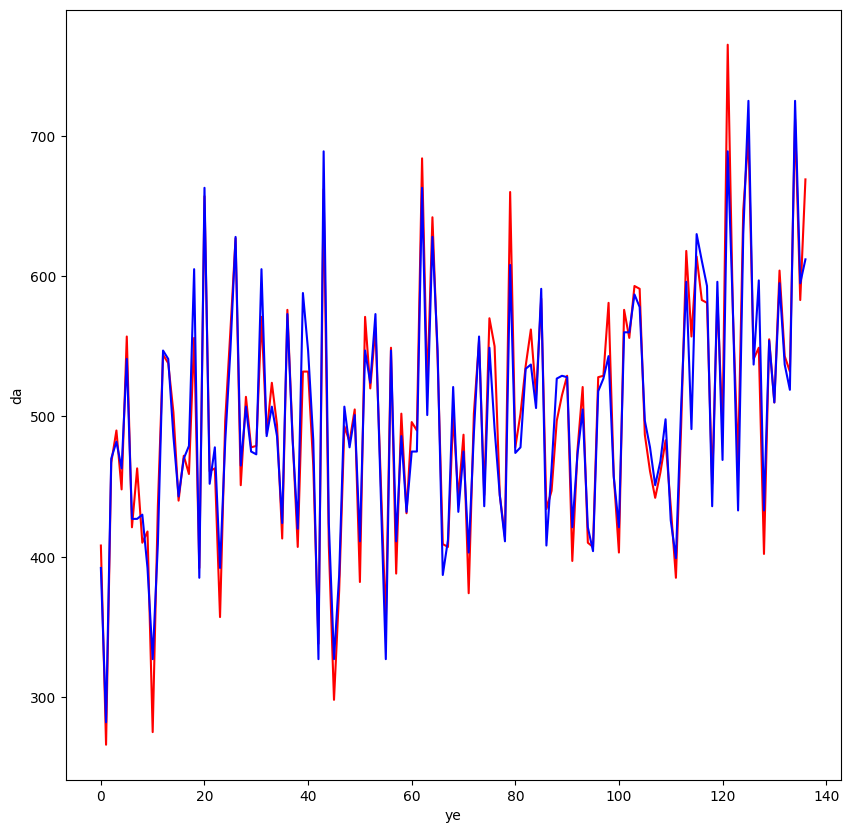

In [70]:
plt.figure(figsize=(10, 10))
x = matplot_model['Yearly_Amount_Spent']
y =  matplot_model['prediction']
plt.plot(x, color = 'red')
plt.plot(y, color = 'blue')
plt.xlabel('ye')
plt.ylabel('da')

plt.show()

In [71]:
from pyspark.ml.evaluation import RegressionEvaluator

In [72]:
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Yearly_Amount_Spent", metricName="rmse")

In [74]:
rmse = evaluator.evaluate(pred)

In [79]:
pred.show()

+--------------------+-------------------+--------------------+--------------------+----------+
|            features|Yearly_Amount_Spent|       rawPrediction|         probability|prediction|
+--------------------+-------------------+--------------------+--------------------+----------+
|[29.5324289670579...|                408|[-16.377784929633...|[1.54264028251698...|     392.0|
|[30.8162006488763...|                266|[-16.410263472371...|[0.0,0.0,0.0,0.0,...|     282.0|
|[30.8364326747734...|                467|[-17.370034472489...|[3.19913869487910...|     470.0|
|[30.8794843441274...|                490|[-17.294744287119...|[3.21340045054214...|     482.0|
|[31.0662181616375...|                448|[-17.046648025317...|[9.44553878491231...|     463.0|
|[31.1280900496166...|                557|[-17.472827005299...|[6.13852208057558...|     541.0|
|[31.2606468698795...|                421|[-17.112621803707...|[6.32034754202424...|     427.0|
|[31.3123495994443...|                46

In [75]:
rmse

21.542522878502485

In [80]:
me = pred.withColumn("error", col("prediction") - col("Yearly_Amount_Spent")).select(avg("error")).collect()[0][0]


In [81]:
me

-0.9854014598540146

In [84]:
predictions = pred.withColumn("error", abs(col("prediction") - col("Yearly_Amount_Spent")))
max_error = predictions.agg(max("error")).collect()[0][0]

In [85]:
max_error

76.0